<a href="https://colab.research.google.com/github/Felipecl22/Portafolio-de-Ciencia-de-Datos/blob/nueva-rama/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Montando el drive para acceder a los archivos, ya que tengo los csv en mi Drive, esto no es necesario si ustedes tienen el archivo en su escritorio.

Mounted at /content/drive


# **Librerías**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

importar archivo

In [ ]:
# Ruta del archivo CSV en Google Drive.
train_csv = '/content/drive/My Drive/Colab Notebooks/Prueba/train.csv'
test_csv = '/content/drive/My Drive/Colab Notebooks/Prueba/test.csv'


In [ ]:
df_train = pd.read_csv(train_csv)
df_test = pd.read_csv(test_csv)

In [ ]:
# Contar valores perdidos por columna
print(df_train.isnull().sum())
print()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64



In [ ]:
# Quitamos valores nulos
df_train.dropna(inplace=True)

In [ ]:
df_train.shape

(183, 12)

In [ ]:
print(df_train.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [ ]:
print(df_train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
df_train_explicadas= df_train[['Sex','Cabin', 'Embarked']].copy()
df_train_explicada= df_train[['Survived']].copy()

In [ ]:
df_train_explicadas.head()

,Sex,Cabin,Embarked
1,female,C85,C
3,female,C123,S
6,male,E46,S
10,female,G6,S
11,female,C103,S


In [ ]:
df_train_explicada.head()

,Survived
1,1
3,1
6,0
10,1
11,1


In [ ]:
print((df_train_explicadas.shape))
print((df_train_explicada.shape))

(183, 3)
(183, 1)


In [ ]:
df_train_explicadas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sex       183 non-null    object
 1   Cabin     183 non-null    object
 2   Embarked  183 non-null    object
dtypes: object(3)
memory usage: 5.7+ KB


In [ ]:
df_train_explicada.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  183 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


Análisis descriptivo por variable:

Media, mediana, desviación estándar, etc.


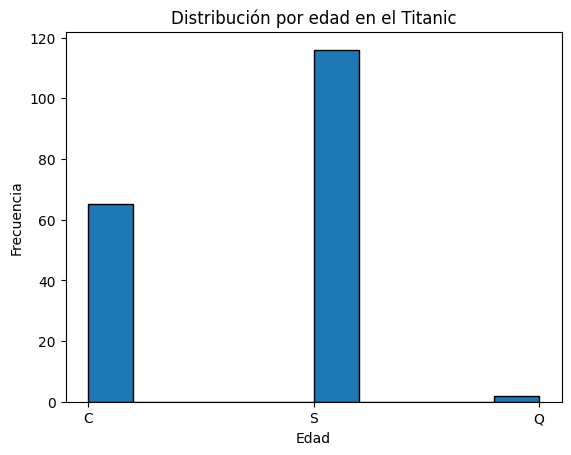

In [ ]:
# Distribución de edad por histograma
plt.hist(df_train_explicadas["Embarked"], edgecolor='black')
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Distribución por edad en el Titanic")
plt.show()

Visualización de relaciones entre variables:

Correlaciones y Gráficos de dispersión

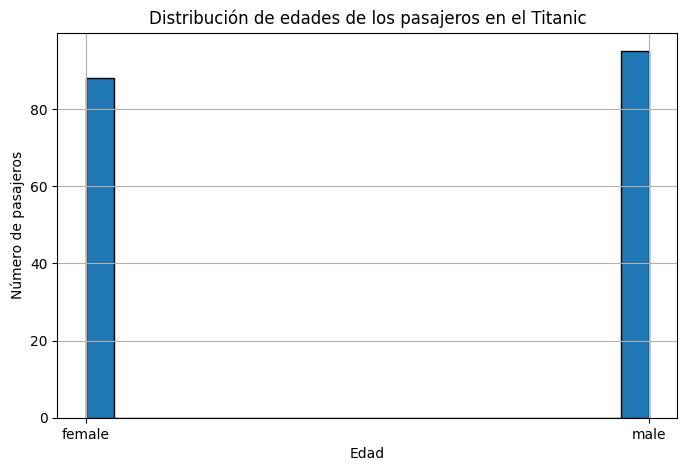

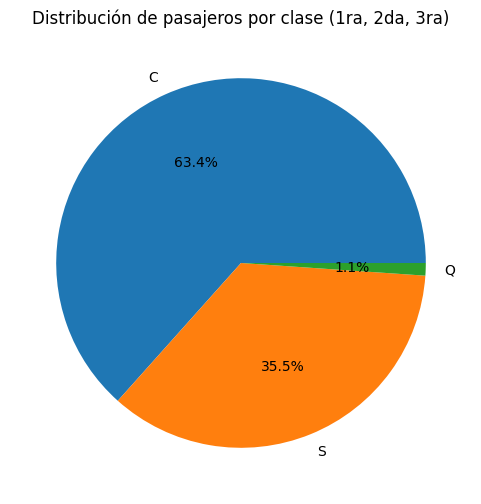

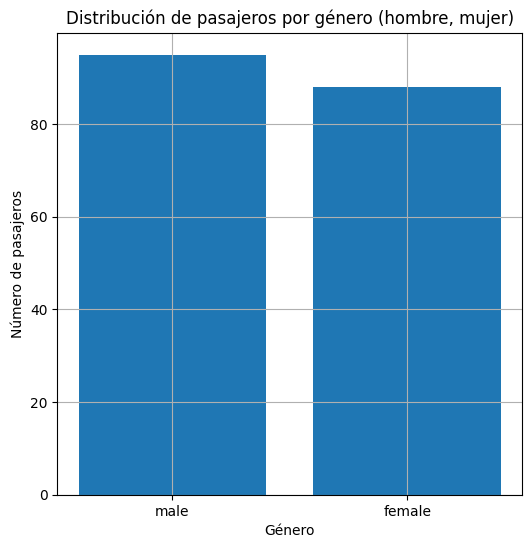

In [ ]:
# --- Gráfico 1: Distribución de edades ---
plt.figure(figsize=(8, 5))
plt.hist(df_train_explicadas["Sex"], bins=20, edgecolor="black")  # Ajuste los bins según sea necesario
plt.xlabel("Edad")
plt.ylabel("Número de pasajeros")
plt.title("Distribución de edades de los pasajeros en el Titanic")
plt.grid(True)
plt.show()

# Conclusión 1: La distribución de edad muestra una variedad de edades a bordo, potencialmente con más niños y adultos jóvenes.

# --- Gráfico 2: Distribución de clases ---
plt.figure(figsize=(6, 6))
plt.pie(df_train_explicadas["Embarked"].value_counts(), labels=df_train_explicadas["Embarked"].unique(), autopct="%1.1f%%")
plt.title("Distribución de pasajeros por clase (1ra, 2da, 3ra)")
plt.show()

# Conclusión 2: La distribución de clases revela una mayor proporción de pasajeros en la tercera clase en comparación con la primera y la segunda.

# --- Gráfico 3: Distribución de género ---
conteo_genero = df_train_explicadas["Sex"].value_counts()
plt.figure(figsize=(6, 6))
plt.bar(conteo_genero.index, conteo_genero.values)
plt.xlabel("Género")
plt.ylabel("Número de pasajeros")
plt.title("Distribución de pasajeros por género (hombre, mujer)")
plt.grid(True)
plt.show()

# Machine Learning

In [ ]:
df_train_explicadas.head()

,Sex,Cabin,Embarked
1,female,C85,C
3,female,C123,S
6,male,E46,S
10,female,G6,S
11,female,C103,S


In [ ]:
# Verificar por variables categóricas

categoricas = []

for var in df_train_explicadas:
    if df_train_explicadas[var].dtype == 'O':
        categoricas.append(var)

print(f'Hay {len(categoricas)} variables categóricas en la dataframe')
print(f'Estas son: {categoricas}')

Hay 3 variables categóricas en la dataframe
Estas son: ['Sex', 'Cabin', 'Embarked']


In [ ]:
# Verificar por variables numéricas

numericas = []

for var in df_train_explicadas:
    if df_train_explicadas[var].dtype != 'O':
        numericas.append(var)

print(f'Hay {len(numericas)} variables numéricas en la dataframe')
print(f'Estas son: {numericas}')

Hay 0 variables numéricas en la dataframe
Estas son: []


# Solo para variables numéricas

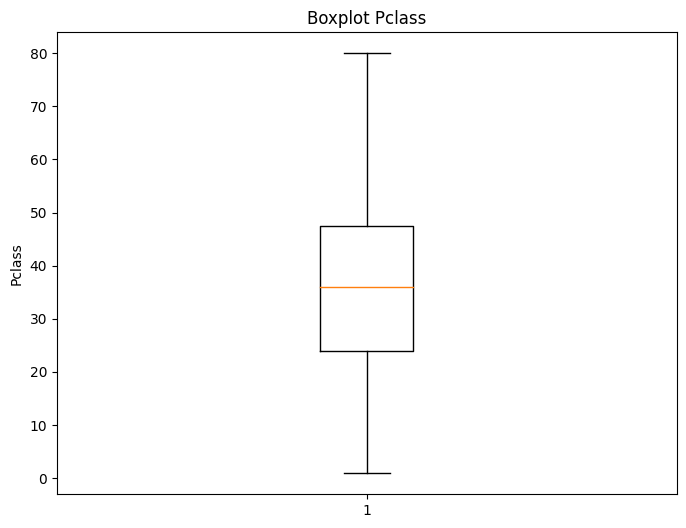

In [ ]:
# Boxplots data, para identificar outliers.

plt.figure(figsize=(8, 6))
plt.boxplot(df_train_explicadas['Age'])
plt.title('Boxplot Pclass')
plt.ylabel('Pclass')
plt.show()


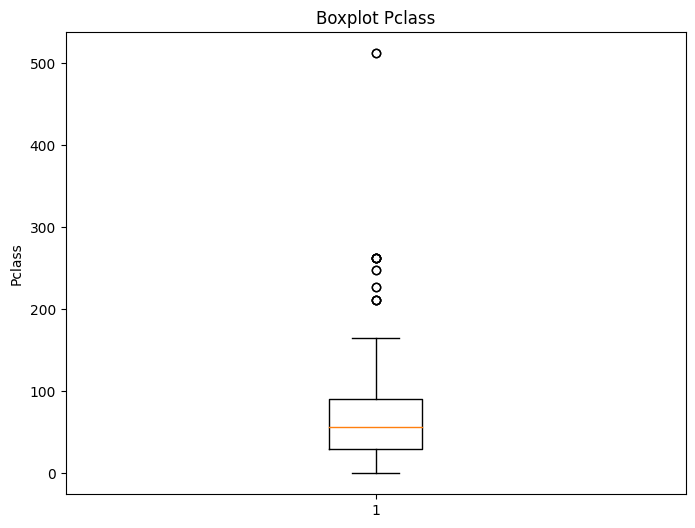

In [ ]:
# Boxplots data, para identificar outliers.

plt.figure(figsize=(8, 6))
plt.boxplot(df_train_explicadas['Fare'])
plt.title('Boxplot Pclass')
plt.ylabel('Pclass')
plt.show()

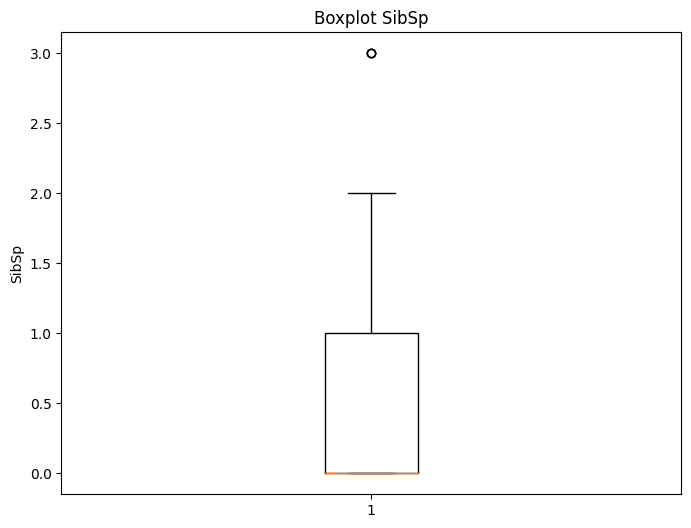

In [ ]:
# Boxplots data, para identificar outliers.

plt.figure(figsize=(8, 6))
plt.boxplot(df_train_explicadas['SibSp'])
plt.title('Boxplot SibSp')
plt.ylabel('SibSp')
plt.show()


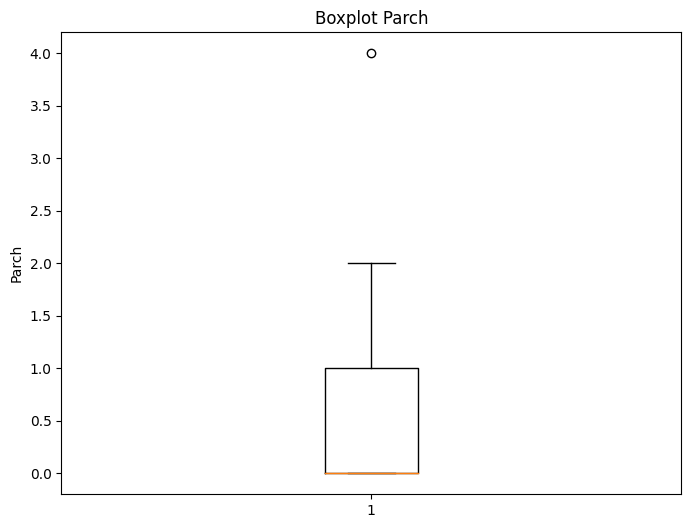

In [ ]:
# Boxplots data, para identificar outliers.

plt.figure(figsize=(8, 6))
plt.boxplot(df_train_explicadas['Parch'])
plt.title('Boxplot Parch')
plt.ylabel('Parch')
plt.show()

In [ ]:
# Calcular el rango intercuartil (IQR)
Q1 = df_train_explicadas[['Age', 'SibSp', 'Parch', 'Fare']].quantile(0.25)
Q3 = df_train_explicadas[['Age', 'SibSp', 'Parch', 'Fare']].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
umbral_inferior = Q1 - 1.5 * IQR
umbral_superior = Q3 + 1.5 * IQR

# Crear un filtro para cada columna
filtro = (df_train_explicadas[['Age', 'SibSp', 'Parch', 'Fare']] >= umbral_inferior) & (df_train_explicadas[['Age', 'SibSp', 'Parch', 'Fare']] <= umbral_superior)

# Mantener solo las filas donde no hay outliers
df_sin_outliers = df_train_explicadas[filtro.all(axis=1)]

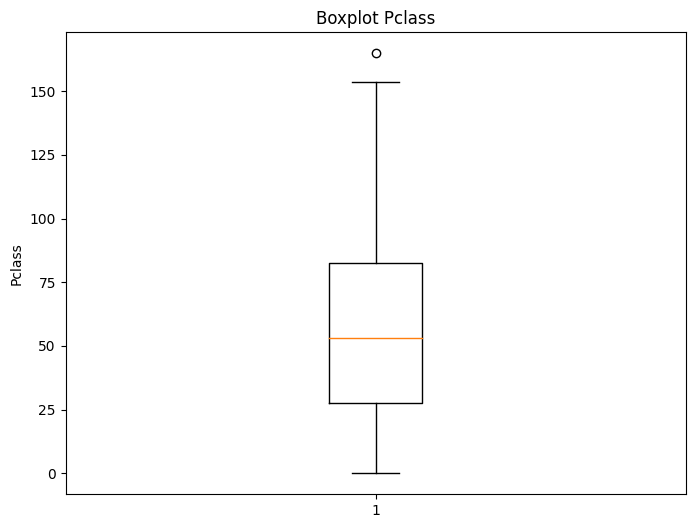

In [ ]:
# Boxplots data, para identificar outliers.

plt.figure(figsize=(8, 6))
plt.boxplot(df_sin_outliers['Fare'])
plt.title('Boxplot Pclass')
plt.ylabel('Pclass')
plt.show()

# Modelo Naïve Bayes


In [ ]:
from sklearn.model_selection import train_test_split
#Split
X_train, X_test, y_train, y_test = train_test_split(df_train_explicadas,
                                                    df_train_explicada['Survived'],
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# Preprocesamiento manual
# Crear la instancia de OneHotEncoder con manejo de categorías desconocidas
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Aplicar el encoding a X_train
X_train_encoded = encoder.fit_transform(X_train)

# Aplicar el encoding a X_test
X_test_encoded = encoder.transform(X_test)

In [ ]:
print(X_train_encoded.shape)
print(X_test_encoded.shape)

(146, 114)
(37, 114)


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Inicializar el modelo
model = GaussianNB()

# Entrenar el modelo
model.fit(X_train_encoded, y_train)

# Realizar predicciones
predictions = model.predict(X_test_encoded)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))


Accuracy: 0.4864864864864865
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.86      0.56        14
           1       0.75      0.26      0.39        23

    accuracy                           0.49        37
   macro avg       0.58      0.56      0.47        37
weighted avg       0.62      0.49      0.45        37



In [ ]:
df_test_prediccion = df_test[['Sex','Cabin', 'Embarked']].copy()

In [ ]:
df_test_prediccion.shape

(418, 3)

In [ ]:
df_test_prediccion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sex       418 non-null    object
 1   Cabin     91 non-null     object
 2   Embarked  418 non-null    object
dtypes: object(3)
memory usage: 9.9+ KB


In [ ]:
print(df_test_prediccion.isnull().sum())

Sex           0
Cabin       327
Embarked      0
dtype: int64


In [ ]:
df_test_prediccion.dropna(inplace=True)

In [ ]:
print(df_test_prediccion.isnull().sum())

Sex         0
Cabin       0
Embarked    0
dtype: int64


In [ ]:
# Preprocesar los datos nuevos
X_test_prediccion_encoded = encoder.transform(df_test_prediccion)

# Realizar las predicciones
y_pred = model.predict(X_test_prediccion_encoded)

# Imprimir las predicciones
print("Predicciones:", y_pred)


Predicciones: [0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0]


In [ ]:
# Convertir a Serie y contar ocurrencias
y_pred_series = pd.Series(y_pred)
counts = y_pred_series.value_counts()
print(counts)

0    70
1    21
Name: count, dtype: int64


In [ ]:
# Convertir predicciones a DataFrame
df_predictions = pd.DataFrame(y_pred, columns=['Predicted_Survived'])

# Imprimir las primeras filas
print(df_predictions.head())

   Predicted_Survived
0                   0
1                   0
2                   1
3                   0
4                   0


In [ ]:
unique_values = df_predictions['Predicted_Survived'].unique()
print(unique_values)

[0 1]
